In [1]:
import glob
import pims
import trackpy as tp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.constants as c
import astropy.units as u
import bmc

In [2]:
# um_per_px for each zoom
x10 = 9.51/13
x20 = 9.51/24
x40 = 9.51/57
fps = 30

In [3]:
def experiment(filepath, diameter, minmass, maxsize, um_per_px):
    annotation = bmc.annotate(filepath, diameter=diameter, minmass=minmass, maxsize=maxsize, show=False, crop=((0,0), (0,0)))
    tracker = bmc.get_trajectories(annotation, search_range=10, diameter=diameter, minmass=minmass, maxsize=maxsize, show=True, clip_stubs=50)
    clear = bmc.clear_drift(tracker, show=False, correct=True)
    return clear

def bead_path(viscosity, solute, size, magnification):
    path = "../data/beads/%s_visc_%s_%s_um-%s*"%(viscosity, solute, size, magnification)
    return glob.glob(path)

Frame 245: 23 trajectories present.


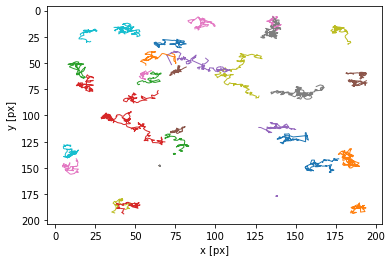

In [14]:
#Test 1
path1 = bead_path("1.66", "PVP", "0.4", "40x")[0] + "/*.bmp"
obs1 = experiment(path1, 11, 500, 3, x40)

<Quantity 0.6464154 um2 / s>

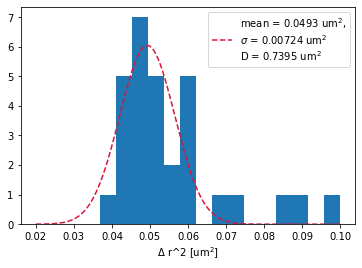

In [17]:
bmc.gaussian_model(obs1, x40, 30, np.linspace(0.02, 0.1, 20), p0=(1,1,1))
bmc.theory_D(0.4, 1.66, 293)

In [ ]:
path2 = bead_path("1.66", "PVP", "2.03", "20x")[0]+"/*.bmp"
obs2 = experiment(path2, 5, 50, 3, x20)

Text(0.5, 1.0, '$\\Delta$')

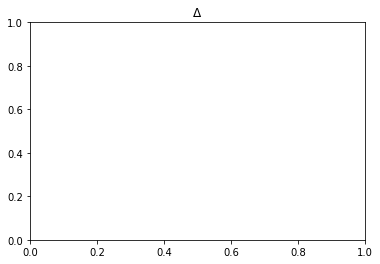